In [1]:
#load our training data
import pandas as pd
import re
import pickle
csv_data = pd.read_csv('datasetFinal3.csv',encoding='latin-1').fillna(0)
csv_data.head()



,comment,target
0,Is there any way we can purchase the distance/...,2
1,Any chance of programming this with the Arduin...,2
2,What is the difficulty with setting up your ro...,2
3,Will there be different languages for the soft...,2
4,Also would love some more info on the distance...,1


In [2]:
# Assign our comments to x and our target to y
X=csv_data.comment
y=csv_data.target

In [3]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#used our vectorizer to convert our words to numbers(bag of words model)
from sklearn.feature_extraction.text import TfidfVectorizer
#instantiate the vectorizer
tfidf = TfidfVectorizer(use_idf=True, norm=None, stop_words='english', ngram_range=(1, 2))
#Learn training data vocabulary , then use it to create a documnet-term
X_train_dtm = tfidf.fit_transform(X_train)
#transform testing data (used fitted vocabulary) into a document-term 
X_test_dtm = tfidf.transform(X_test)

In [5]:
#import and instantiate a multinonial naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
#train the moderl using X_train_dtm
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
#pickle our classifer so that we dont have to recompile everything
save_classifer = open("MNB.pickle","wb")
pickle.dump(nb,save_classifer)
save_classifer.close()
#make class prediction on X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [7]:
#test our training data from the splited documents
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred_class))

0.6333333333333333


In [8]:
#New python file
#import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
import pickle
import numpy as np
import re
from wordcloud import WordCloud

In [9]:
#import our pickled classifer
open_file = open("MNB.pickle","rb")
nb_classifer=pickle.load(open_file)
open_file.close

<function BufferedReader.close>

In [10]:
# this is where we save common words and general words
pos_common_words=""
neg_common_words=""
neu_common_words=""
pos_general_words=""
neg_general_words=""
neu_general_words=""

In [11]:
#Function that we will take a text and predict whether a sentence is positive, neutral and negative  
def sentiment(text):
    return nb_classifer.predict(tfidf.transform([text]))#takes the naive bayes model to predict the sentiment of a text

In [26]:
#load our actual dataset 
csv_data = pd.read_csv('100.csv',encoding='latin-1').fillna(0)
csv_data

,Unnamed: 0,URL,comment,title
0,0,https://www.kickstarter.com/projects/arcbotics...,"Well, it'll be two months tomorrow, since las...",Hubert the Humanoid: Your Advanced Robotics St...
1,1,https://www.kickstarter.com/projects/bjpirt/mi...,@KJT It's a very widely available 9g micro se...,Mirobot - the DIY WiFi robot for children by B...
2,2,https://www.kickstarter.com/projects/194711332...,"Hello Catherine!~Hello Nous Team, and congrat...",Bucky | An EdTech robot to narrow technology-a...
3,3,https://www.kickstarter.com/projects/dobot/dob...,Backer #345. Got a tracking number.~i am Back...,Dobot M1: Pro Robotic Arm for Makers and Busin...
4,4,https://www.kickstarter.com/projects/164766064...,I just started building the fingers for my ar...,Meet Roy - An experiment in Animatronics: Part...
5,5,https://www.kickstarter.com/projects/159919178...,Thanks for the update.I wish you could give u...,KUMIITA â Educational programming toy for 0 ...
6,6,https://www.kickstarter.com/projects/rse/world...,Got my shirt today; Keep us updated on the go...,Worlds First Eco Robot Protecting Reefs from L...
7,7,https://www.kickstarter.com/projects/crazypi/c...,Where can I update my shipping address?~Crazy...,CrazyPi - The True Robot Kit For DIY Robot Lov...
8,8,https://www.kickstarter.com/projects/frobotics...,"Colm, you asked for a refund. The full amount...",MonsterBorg - The Raspberry Pi Monster Robot b...
9,9,https://www.kickstarter.com/projects/460355237...,@hotty See DM.~you know china is so special d...,The Crafty Robot (the Â£5 Robot) by Ross Atkin...


In [13]:
#predict a text sentiment calling sentiment(text)function  and indicate the percentage of postive, negative, neutral and discard
def prediction(texts):
    positive=0
    negative=0
    neutral = 0
    discard=0
    total=0
    totalpos=0
    totalneg=0
    totalneu=0
    totaldiscard=0
    if len(texts)==0:
        return[0,0,0,0]
    else:
        for r in texts.split('~'):
        
            if len(r)>25:
                if sentiment(r) == 0:
                    negative+= 1
                    total+= 1
                    global neg_general_words
                    neg_general_words += r
                elif sentiment(r) == 1:
                    positive+= 1
                    total+= 1
                    global pos_general_words
                    pos_general_words += r
                elif sentiment(r) == 2:
                    neutral+= 1
                    total+= 1
                    global neu_general_words
                    neu_general_words += r
                else:
                    discard+= 1
                    total+= 1
    
    if positive==0:
        totalpos=0
    else:
        totalpos=(positive/total)*100
    
    if negative==0:
        totalneg=0
    else:
        totalneg=(negative/total)*100
    
    if neutral==0:
        totalneu=0
    else:
        totalneu=(neutral/total)*100
    
    if discard==0:
        totaldiscard=0
    else:
        totaldiscard=(discard/total)*100
    
    return [totalpos , totalneg,totalneu,totaldiscard]

In [29]:
# it will return the common words within a corpus
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    if len(corpus)>15:
        #it removes the unnecessary words
        corpus=re.sub('Congratulations ','', corpus)
        corpus=re.sub('thanks ','', corpus)
        corpus=re.sub('Thanks','', corpus)
        corpus=re.sub('Hello','', corpus)
        corpus=re.sub('hello','', corpus)
        corpus=re.sub('catherine ','', corpus)
        corpus=re.sub('woooo','', corpus)
        corpus=re.sub('jeanne','', corpus)
        corpus=re.sub('taylor','', corpus)
        corpus=re.sub('woooo','', corpus)
        corpus=re.sub('thank ','', corpus)
        corpus=re.sub('Thank ',' ', corpus)
        corpus=re.sub('hi ','', corpus)
        corpus=re.sub('Hi ','', corpus)
        corpus=re.sub('anthony','', corpus)
        corpus=re.sub('kickstarter','', corpus)
        #print ('neu_common_words yooooooooooooooooooooooo')
        #print (corpus)
        
        #converts the string to a list
        convertList=[]
        for r in corpus.split('~'):
            convertList.append(r)
        #print (convertList)
        #instantiate the vectorizer
        vec = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english').fit(convertList)
        #transform testing data (used fitted vocabulary) into a document-term
        bag_of_words = vec.transform(convertList)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
        #sorts the words based on how many times they appear
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words=""
        #takes the nth words from words_freq
        for x in words_freq[:n]:
            words+=x[0] + " "
        return words

In [15]:
def add_words(text,index):
    if text:
        if len(text)>2:
            if index==1:
                global pos_common_words
                pos_common_words += text
            elif index==0:
                global neg_common_words
                neg_common_words += text
            elif index==2:
                global neu_common_words
                neu_common_words += text

In [31]:
#calls the prediction function to predict the sentiment of the text and save values on postive,negative and neutral colomns 
csv_data['positive'],csv_data['negative'],csv_data['neutral'],csv_data['discard'] = zip(*csv_data.comment.apply(lambda row:prediction(row)))
#it will call get_top_n_words(corpus, n=None) to get the common words
csv_data['common_words'] = csv_data.comment.apply(lambda row:get_top_n_words(row, 10))
csv_data

,Unnamed: 0,URL,comment,title,positive,negative,neutral,discard,common_words
0,0,https://www.kickstarter.com/projects/arcbotics...,"Well, it'll be two months tomorrow, since las...",Hubert the Humanoid: Your Advanced Robotics St...,25.925926,7.407407,55.555556,11.111111,james updates update news long progress chris ...
1,1,https://www.kickstarter.com/projects/bjpirt/mi...,@KJT It's a very widely available 9g micro se...,Mirobot - the DIY WiFi robot for children by B...,73.170732,0.000000,24.390244,2.439024,ben congratulations mathias update good mirobo...
2,2,https://www.kickstarter.com/projects/194711332...,"Hello Catherine!~Hello Nous Team, and congrat...",Bucky | An EdTech robot to narrow technology-a...,100.000000,0.000000,0.000000,0.000000,catherine bucky software open source open sour...
3,3,https://www.kickstarter.com/projects/dobot/dob...,Backer #345. Got a tracking number.~i am Back...,Dobot M1: Pro Robotic Arm for Makers and Busin...,55.000000,2.500000,27.500000,15.000000,dobot ralf backer raphael creator news eric ne...
4,4,https://www.kickstarter.com/projects/164766064...,I just started building the fingers for my ar...,Meet Roy - An experiment in Animatronics: Part...,47.916667,0.000000,47.916667,4.166667,brian fingers just arm soon roy project update...
5,5,https://www.kickstarter.com/projects/159919178...,Thanks for the update.I wish you could give u...,KUMIITA â Educational programming toy for 0 ...,39.473684,7.894737,44.736842,7.894737,creators update ¾ã meghan batteries great upda...
6,6,https://www.kickstarter.com/projects/rse/world...,Got my shirt today; Keep us updated on the go...,Worlds First Eco Robot Protecting Reefs from L...,72.727273,0.000000,27.272727,0.000000,good project lionfish ricky luck team good luc...
7,7,https://www.kickstarter.com/projects/crazypi/c...,Where can I update my shipping address?~Crazy...,CrazyPi - The True Robot Kit For DIY Robot Lov...,28.260870,2.173913,58.695652,10.869565,crazypi update received hi camera board parts ...
8,8,https://www.kickstarter.com/projects/frobotics...,"Colm, you asked for a refund. The full amount...",MonsterBorg - The Raspberry Pi Monster Robot b...,39.024390,4.878049,36.585366,19.512195,tim shipping arrived waiting received monsterb...
9,9,https://www.kickstarter.com/projects/460355237...,@hotty See DM.~you know china is so special d...,The Crafty Robot (the Â£5 Robot) by Ross Atkin...,73.913043,2.173913,13.043478,10.869565,got arrived received robots like christmas tod...


In [33]:
#Compares and outputs the maximum of the postive, negative, and netural values
csv_data['Max'] = csv_data[['positive','negative','neutral','discard']].idxmax(axis=1)
csv_data

,Unnamed: 0,URL,comment,title,positive,negative,neutral,discard,common_words,Max
0,0,https://www.kickstarter.com/projects/arcbotics...,"Well, it'll be two months tomorrow, since las...",Hubert the Humanoid: Your Advanced Robotics St...,25.925926,7.407407,55.555556,11.111111,james updates update news long progress chris ...,neutral
1,1,https://www.kickstarter.com/projects/bjpirt/mi...,@KJT It's a very widely available 9g micro se...,Mirobot - the DIY WiFi robot for children by B...,73.170732,0.000000,24.390244,2.439024,ben congratulations mathias update good mirobo...,positive
2,2,https://www.kickstarter.com/projects/194711332...,"Hello Catherine!~Hello Nous Team, and congrat...",Bucky | An EdTech robot to narrow technology-a...,100.000000,0.000000,0.000000,0.000000,catherine bucky software open source open sour...,positive
3,3,https://www.kickstarter.com/projects/dobot/dob...,Backer #345. Got a tracking number.~i am Back...,Dobot M1: Pro Robotic Arm for Makers and Busin...,55.000000,2.500000,27.500000,15.000000,dobot ralf backer raphael creator news eric ne...,positive
4,4,https://www.kickstarter.com/projects/164766064...,I just started building the fingers for my ar...,Meet Roy - An experiment in Animatronics: Part...,47.916667,0.000000,47.916667,4.166667,brian fingers just arm soon roy project update...,positive
5,5,https://www.kickstarter.com/projects/159919178...,Thanks for the update.I wish you could give u...,KUMIITA â Educational programming toy for 0 ...,39.473684,7.894737,44.736842,7.894737,creators update ¾ã meghan batteries great upda...,neutral
6,6,https://www.kickstarter.com/projects/rse/world...,Got my shirt today; Keep us updated on the go...,Worlds First Eco Robot Protecting Reefs from L...,72.727273,0.000000,27.272727,0.000000,good project lionfish ricky luck team good luc...,positive
7,7,https://www.kickstarter.com/projects/crazypi/c...,Where can I update my shipping address?~Crazy...,CrazyPi - The True Robot Kit For DIY Robot Lov...,28.260870,2.173913,58.695652,10.869565,crazypi update received hi camera board parts ...,neutral
8,8,https://www.kickstarter.com/projects/frobotics...,"Colm, you asked for a refund. The full amount...",MonsterBorg - The Raspberry Pi Monster Robot b...,39.024390,4.878049,36.585366,19.512195,tim shipping arrived waiting received monsterb...,positive
9,9,https://www.kickstarter.com/projects/460355237...,@hotty See DM.~you know china is so special d...,The Crafty Robot (the Â£5 Robot) by Ross Atkin...,73.913043,2.173913,13.043478,10.869565,got arrived received robots like christmas tod...,positive


In [18]:
#common words are selected and added to teh add_word functions which will later be used for display in the world cloud function
csv_data.apply(lambda x: (x['Max']=='positive' and add_words(x['common_words'],1)) or (x['Max']=='negative' and add_words(x['common_words'],0)) or (x['Max']=='neutral' and add_words(x['common_words'],2)),axis=1)

0      None
1     False
2     False
3     False
4     False
5      None
6     False
7      None
8     False
9     False
10    False
11    False
12    False
13     None
14     None
15    False
16    False
17     None
18    False
19    False
20    False
21    False
22     None
23     None
24     None
25     None
26    False
27    False
28    False
29    False
      ...  
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77     None
78    False
79     None
80    False
81    False
82    False
83    False
84     None
85    False
86    False
87     None
88     None
89    False
90    False
91    False
92    False
93    False
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: object

In [23]:
#instantiante our wordcloud 
wordcloud = WordCloud().generate(pos_common_words)
wordcloud3 = WordCloud().generate(neu_common_words)

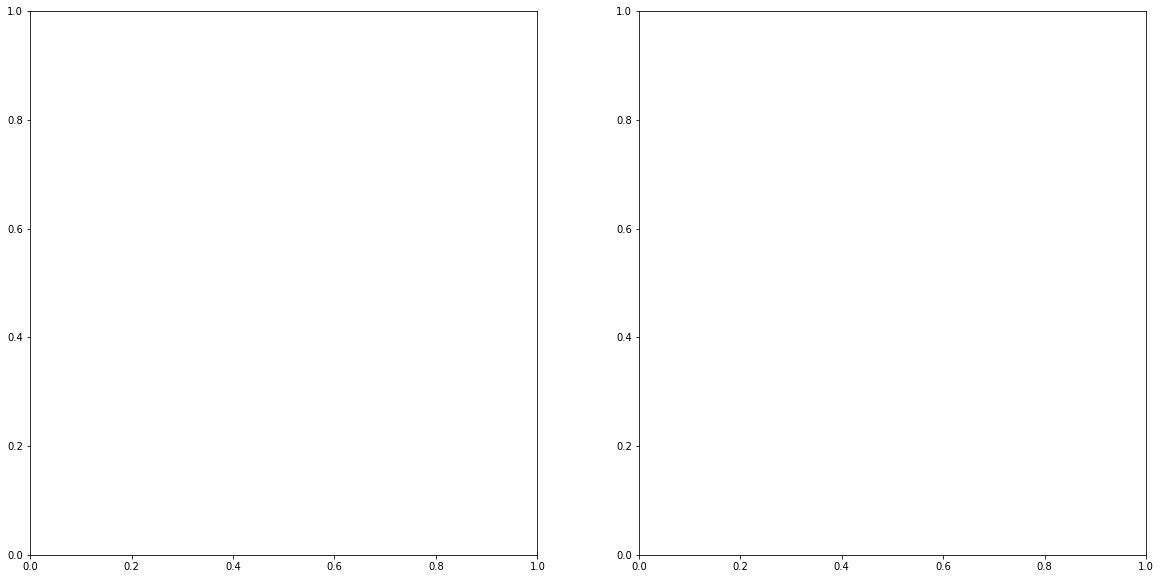

In [20]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,2, figsize=(20, 10))

In [21]:

axarr[0].imshow(wordcloud, interpolation='bilinear')
axarr[1].imshow(wordcloud3, interpolation='bilinear')

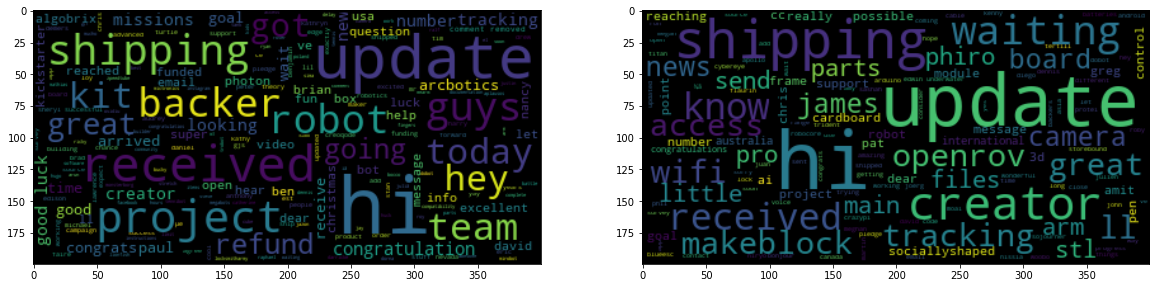

In [24]:
#display the word cloud
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(wordcloud, interpolation='bilinear')
axarr[1].imshow(wordcloud3, interpolation='bilinear')

In [25]:
csv_data

,Unnamed: 0,URL,comment,title,positive,negative,neutral,discard,common_words,Max
0,0,https://www.kickstarter.com/projects/arcbotics...,"Well, it'll be two months tomorrow, since las...",Hubert the Humanoid: Your Advanced Robotics St...,25.925926,7.407407,55.555556,11.111111,hi updates james hi james update news long pro...,neutral
1,1,https://www.kickstarter.com/projects/bjpirt/mi...,@KJT It's a very widely available 9g micro se...,Mirobot - the DIY WiFi robot for children by B...,73.170732,0.000000,24.390244,2.439024,ben hi hi ben congratulations mathias update g...,positive
2,2,https://www.kickstarter.com/projects/194711332...,"Hello Catherine!~Hello Nous Team, and congrat...",Bucky | An EdTech robot to narrow technology-a...,100.000000,0.000000,0.000000,0.000000,catherine bucky software open source open sour...,positive
3,3,https://www.kickstarter.com/projects/dobot/dob...,Backer #345. Got a tracking number.~i am Back...,Dobot M1: Pro Robotic Arm for Makers and Busin...,55.000000,2.500000,27.500000,15.000000,dobot ralf backer raphael creator news eric ne...,positive
4,4,https://www.kickstarter.com/projects/164766064...,I just started building the fingers for my ar...,Meet Roy - An experiment in Animatronics: Part...,47.916667,0.000000,47.916667,4.166667,brian fingers just arm soon roy project update...,positive
5,5,https://www.kickstarter.com/projects/159919178...,Thanks for the update.I wish you could give u...,KUMIITA â Educational programming toy for 0 ...,39.473684,7.894737,44.736842,7.894737,creators update ¾ã meghan batteries great upda...,neutral
6,6,https://www.kickstarter.com/projects/rse/world...,Got my shirt today; Keep us updated on the go...,Worlds First Eco Robot Protecting Reefs from L...,72.727273,0.000000,27.272727,0.000000,good project lionfish ricky luck team good luc...,positive
7,7,https://www.kickstarter.com/projects/crazypi/c...,Where can I update my shipping address?~Crazy...,CrazyPi - The True Robot Kit For DIY Robot Lov...,28.260870,2.173913,58.695652,10.869565,crazypi update received hi camera board parts ...,neutral
8,8,https://www.kickstarter.com/projects/frobotics...,"Colm, you asked for a refund. The full amount...",MonsterBorg - The Raspberry Pi Monster Robot b...,39.024390,4.878049,36.585366,19.512195,hi tim shipping arrived waiting received monst...,positive
9,9,https://www.kickstarter.com/projects/460355237...,@hotty See DM.~you know china is so special d...,The Crafty Robot (the Â£5 Robot) by Ross Atkin...,73.913043,2.173913,13.043478,10.869565,got arrived received robots like christmas tod...,positive
